# **Curso** : Machine Learning para los Negocios

**Sesión 05**
Modelos Simples de Regresión

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe

# Importamos librerías

In [134]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

# Parte 1- Regresión Lineal

## A) Experimentación teórica

Generamos alteatoriamente 100 elementos. Son pares ordenados, en donde la variable Y es igual a la variable X, más un error aleatorio (que viene de una distribución normal)

In [135]:
X = 2*np.random.rand(100,1)

In [137]:

y = 4 + 3 *X + np.random.rand(100,1)

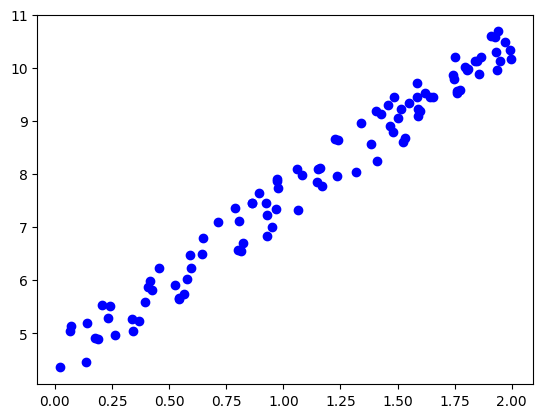

In [138]:
plt.plot(X, y, 'o', color='blue')

In [139]:
#Calculamos el theta optimo usando OLS
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.5081917 ],
       [3.02281602]])

In [141]:
#Ahora podemos hacer predicciones usando theta_best. Por ejemplo para predecir los Y, cuando X= 0, X=2, X=3
X_new =np.array([[0],[1.5],[2]])
X_new

array([[0. ],
       [1.5],
       [2. ]])

In [142]:
theta_best. # Tiene a m y b

array([[4.5081917 ],
       [3.02281602]])

In [143]:
X_new_b = np.c_[np.ones((3,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5081917 ],
       [ 9.04241572],
       [10.55382373]])

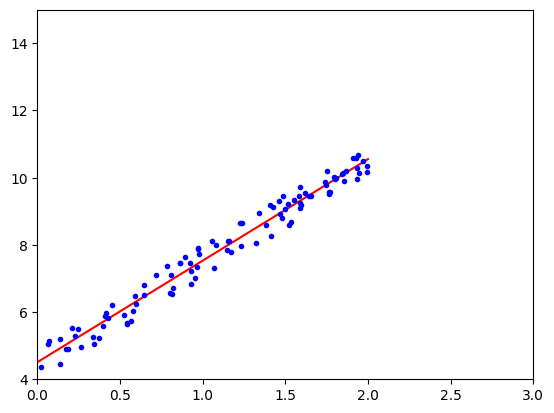

In [144]:
#Ploteamos la recta que minimiza el error de rojo
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,'b.')
plt.axis([0,3,4,15])
plt.show()

In [145]:
#Comparamos usando Scikit Learn
from sklearn.linear_model import LinearRegression

#Paso 1: Instaciamos el modelo de regresión lineal
lin_reg = LinearRegression()

#Paso 2: Entrenamos con todos los elementos
lin_reg.fit(X,y)

LinearRegression()

In [146]:
#Verificamos thetas
lin_reg.intercept_, lin_reg.coef_

(array([4.5081917]), array([[3.02281602]]))

In [147]:
X_new

array([[0. ],
       [1.5],
       [2. ]])

In [148]:
#Predecimos
lin_reg.predict(X_new)

array([[ 4.5081917 ],
       [ 9.04241572],
       [10.55382373]])

In [173]:
#Implemetación de Gradiente Descendente
eta = 0.1  #Learning rate
n_iteraciones = 200
m=100 # tamaño de puntos

theta = np.random.randn(2,1)   #inicializador aleatorio

for iteracion in range(n_iteraciones):

    gradiente = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradiente

In [159]:
lin_reg.intercept_, lin_reg.coef_

(array([4.5081917]), array([[3.02281602]]))

In [174]:
theta

array([[4.50552733],
       [3.02486228]])

## B) - Caso Práctico (Communities and Crime)


Se incluyen muchas variables para que los algoritmos que seleccionan o aprenden pesos para los atributos puedan ser probados. Sin embargo, no se incluyeron atributos claramente no relacionados; los atributos se seleccionaron si existía alguna conexión plausible con el crimen (N=122), además del atributo a predecir (Crimen Violento Per Cápita). Las variables incluidas en el conjunto de datos involucran a la comunidad, como el porcentaje de la población considerada urbana y el ingreso familiar medio, e involucran a la aplicación de la ley, como el número per cápita de agentes de policía y el porcentaje de agentes asignados a unidades antidrogas.

La variable de crimen violento per cápita se calculó utilizando la población y la suma de variables de crimen consideradas crímenes violentos en Estados Unidos: asesinato, violación, robo y asalto. Aparentemente, hubo cierta controversia en algunos estados respecto al conteo de violaciones. Esto resultó en valores faltantes para violación, lo que resultó en valores incorrectos para el crimen violento per cápita. Estas ciudades no están incluidas en el conjunto de datos. Muchas de estas comunidades omitidas eran del medio oeste de EE. UU.

Los datos se describen a continuación basándose en valores originales. Todos los datos numéricos se normalizaron en el rango decimal 0.00-1.00 utilizando un método de particionamiento no supervisado de intervalo igual. Los atributos conservan su distribución y sesgo (por lo tanto, por ejemplo, el atributo de población tiene un valor medio de 0.06 porque la mayoría de las comunidades son pequeñas). Por ejemplo, un atributo descrito como 'personas promedio por hogar' es en realidad la versión normalizada (0-1) de ese valor.

http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [175]:
#Leemos los datos
crime = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_4/crimedata.csv')

In [177]:
crime.shape

(2215, 126)

In [178]:
crime.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,...,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murdPerPop,autoTheft
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0.0,16
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0.0,26
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?,?,?,?,0.0,?,8.3,136
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,5.2,3217.7,3.31,?,?,?,?,0.0,?,0.0,47
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,...,?,?,?,?,?,?,?,?,?,?,?,?,?,?,11.5,974.2,0.38,?,?,?,?,0.0,?,0.0,91


In [179]:
#Eliminamos las variables que no vamos a necesitar por ahora
del_col = ['communityname','state','countyCode','communityCode','fold']

crime.drop(del_col, axis=1, inplace=True)

In [180]:
#Para visualizar todas las columnas / filas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [181]:
crime.isna().sum()

population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
PctEmplManu              0
PctEmplProfServ          0
PctOccupManu             0
P

In [182]:
crime.shape

(2215, 121)

In [183]:
crime.sample(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccMedVal,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murdPerPop,autoTheft
469,39757,2.51,0.67,98.16,0.69,0.71,15.57,29.35,16.30,14.32,39757,100.00,24051,74.79,0.40,34.91,31.82,10.26,12.09,30903,12277,12355,4538,5332,8624,14367,10190,5231,13.95,20.79,36.26,9.73,7.50,59.72,25.95,24.35,20.56,18.75,11.24,31.55,13.01,12.19,2.94,66.51,64.79,62.98,75.37,65.22,72.83,823,2.55,2254,3.02,3.68,4.26,5.32,0.17,0.21,0.24,0.30,64.38,2.48,2.91,1.93,2.37,2.68,2.09,53.25,1.41,55.33,2,1295,92.43,47.03,4.48,38.38,1946,6.29,0.37,87200,329,394,361,25.8,20.6,14.3,59,0,5.67,76.62,49.91,84.23,90.90,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,35.3,1125.5,0.97,?,?,?,?,0.00,?,0.00,52
1881,15648,2.45,4.47,93.33,1.34,1.49,11.25,36.13,16.47,3.55,15107,96.54,35550,92.44,0.93,53.03,8.91,2.84,5.42,42970,17668,18215,8912,10400,12080,5452,4949,803,5.34,2.52,7.34,37.44,1.90,80.77,10.91,29.16,7.24,34.40,10.51,40.50,11.38,10.94,2.98,78.08,78.87,88.33,73.07,70.24,77.60,135,1.87,503,20.08,28.03,40.16,49.30,0.65,0.90,1.29,1.58,95.58,0.41,2.37,1.34,2.36,2.97,1.97,49.12,1.39,58.82,2,286,95.72,39.01,0.00,15.03,1975,0.73,0.46,95200,446,490,468,22.0,22.0,11.7,0,0,3.21,69.68,34.51,72.10,88.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,36.2,432.5,3.04,?,?,?,?,0.00,?,0.00,25
1606,38975,3.04,0.33,97.15,1.37,1.02,14.76,30.07,12.61,2.99,38640,99.14,40404,93.33,0.93,40.45,9.46,3.65,7.88,41860,13841,13958,12848,8907,10006,8213,5470,2031,5.23,3.19,12.71,14.63,4.52,79.91,27.75,17.38,19.03,19.27,8.94,27.24,11.75,10.35,3.34,81.10,80.15,88.90,78.83,74.23,81.15,439,1.71,576,8.16,16.32,19.62,27.43,0.12,0.24,0.29,0.41,96.41,0.33,4.54,3.73,3.04,3.09,2.60,91.59,2.46,29.90,3,351,97.34,90.16,0.57,20.23,1977,0.52,0.05,80600,491,587,539,27.0,21.0,11.6,0,1,1.48,78.41,54.40,75.49,94.40,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,35.0,1114.0,2.07,?,?,?,?,0.00,?,0.00,102
466,68235,2.65,1.08,93.83,2.75,3.35,14.27,26.91,12.71,8.81,68235,100.00,31833,82.31,0.98,39.06,21.39,4.91,14.70,36664,13526,13704,11039,10871,12440,7190,7960,5550,8.25,5.03,16.35,15.89,4.36,68.11,16.05,20.25,14.72,22.46,10.70,27.10,14.71,12.79,3.10,76.07,74.50,83.68,77.84,61.23,71.26,1024,2.14,3490,16.53,26.76,34.87,38.74,0.85,1.37,1.78,1.98,93.01,1.33,4.00,2.87,2.62,2.83,2.33,63.02,2.85,42.20,3,1273,95.28,58.35,1.81,18.22,1974,2.58,0.15,71100,386,467,446,26.1,20.6,14.1,22,0,5.11,51.99,44.93,76.07,87.28,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,22.9,2984.9,5.73,?,?,?,?,0.00,?,1.25,67

In [184]:
#Reemplazamos ? con NA
import numpy as np
crime = crime.replace('?',np.nan)

In [ ]:
crime.head()

In [185]:
crime.shape

(2215, 121)

In [186]:
crime.isna().sum()

population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnderPov              0
PctLess9thGrade             0
PctNotHSGrad                0
PctBSorMore                 0
PctUnemployed               0
PctEmploy 

<Axes: >

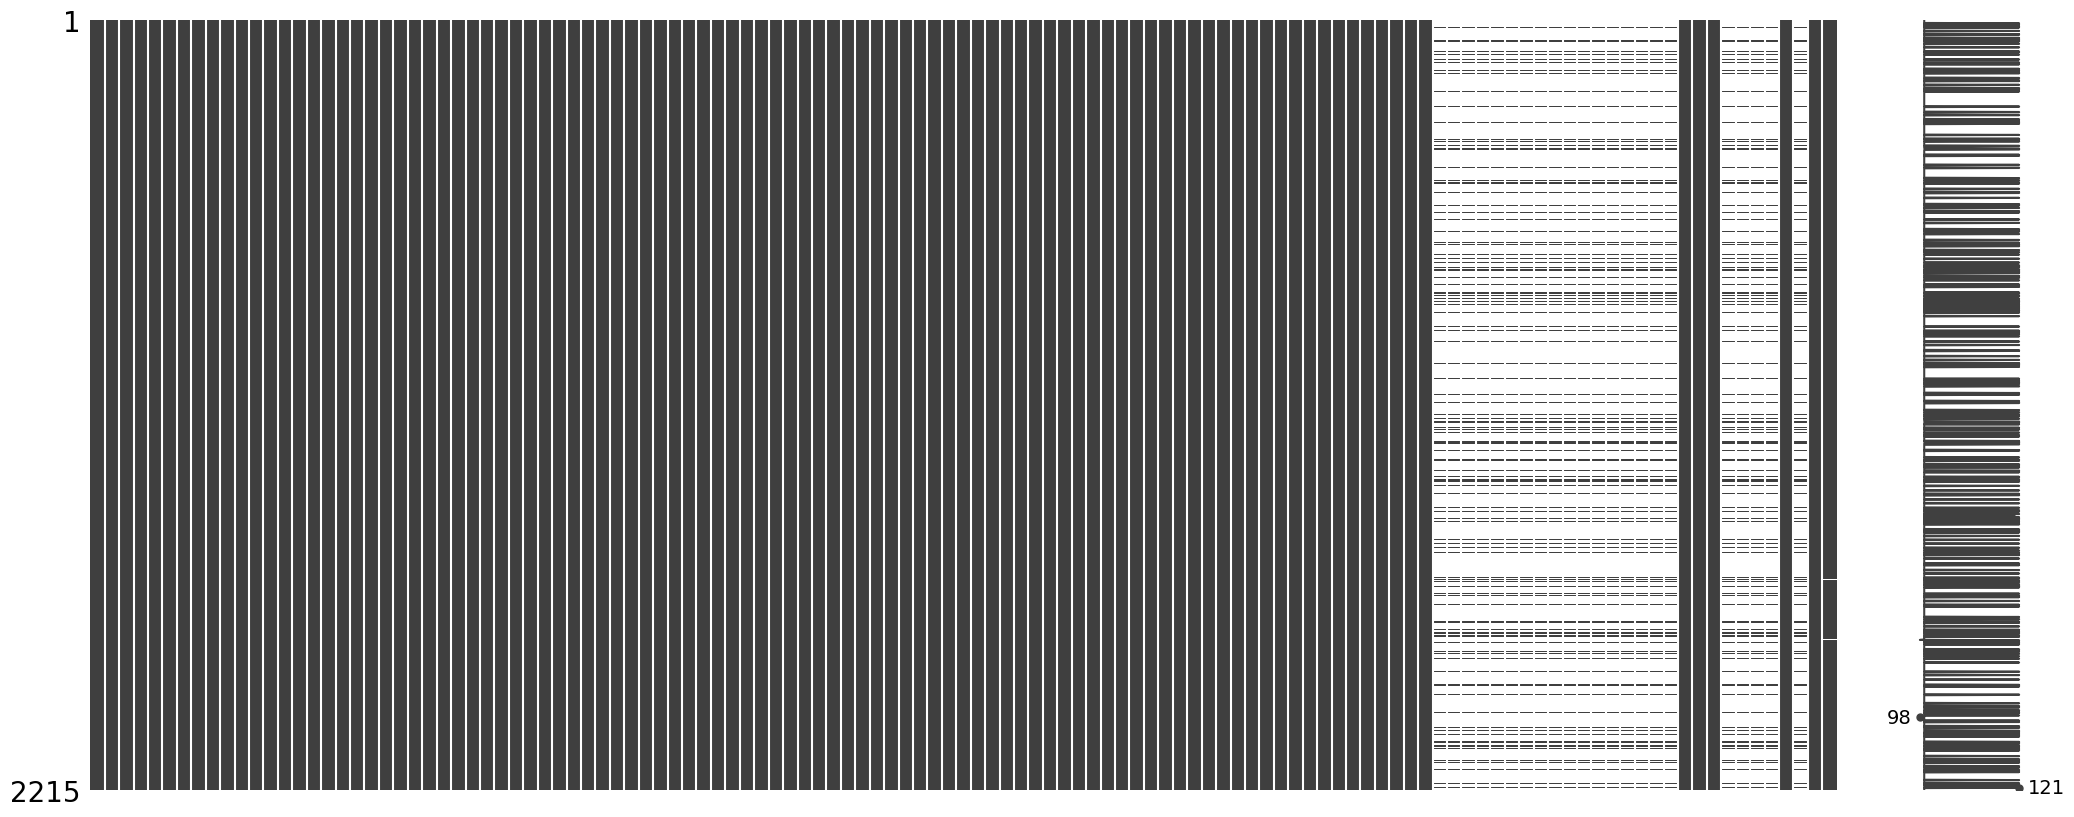

In [187]:
import missingno as msno
msno.matrix(crime)

In [188]:
#Creamos df con nulos
df_nan = crime.isna().sum().to_frame().reset_index()
df_nan.columns = ['column','nan_number']
df_nan.sort_values('nan_number', ascending=False)
df_nan_top = df_nan[df_nan['nan_number']>1600]['column'].tolist()
df_nan_top

['LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [189]:
crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccMedVal,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murdPerPop,autoTheft
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,262600,1001,1001,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0.0,16
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,164200,560,672,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0.0,26
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,90400,428,520,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,8.3,136
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,49600,250,309,333,28.7,20.6,14.5,

In [190]:
crime_ = crime.drop(df_nan_top, axis=1)

In [191]:
crime.shape, crime_.shape

((2215, 121), (2215, 99))

In [192]:
crime_.isna().sum()

population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              1
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
PctEmplManu              0
PctEmplProfServ          0
PctOccupManu             0
P

In [193]:
crime_v = crime_.dropna()

In [194]:
crime_v.shape

(2211, 99)

In [195]:
crime_v.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccMedVal,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murdPerPop,autoTheft
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,262600,1001,1001,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0.0,16
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,164200,560,672,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0.0,26
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,90400,428,520,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,8.3,136
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,49600,250,309,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,0.0,47
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,66.51,79.17,61.22,68.94,402,4.70,196,46.94,56.12,67.86,69.90,0.82,0.98,1.18,1.22,94.64,0.39,5.23,3.11,2.35,2.55,2.12,58.13,2.94,55.64,2,333,92.45,53.57,3.90,42.64,1958,7.45,0.82,43200,283,362,332,32.2,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0,0.0,91


<Axes: >

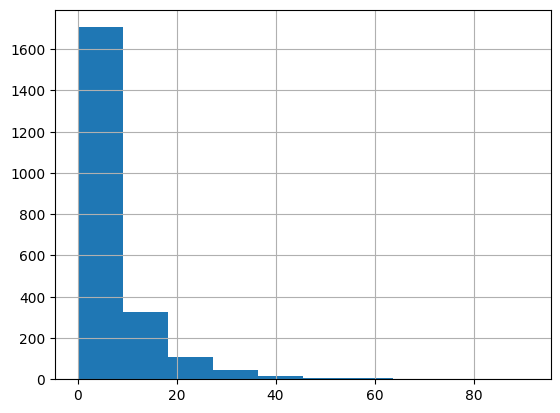

In [218]:
crime_v['murdPerPop'].hist()

**murdPerPop**: number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)

In [219]:
crime_v2 = crime_v[crime_v['murdPerPop']>1]

In [232]:
#Dividimos los datos en X y Y. Queremos predecir la cantidad de Homidios

X = crime_v.drop('murdPerPop', axis=1)
y = crime_v['murdPerPop']

In [233]:
# Dividimos en Train y Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [234]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccMedVal,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,autoTheft
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,262600,1001,1001,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,16
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,164200,560,672,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,26
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,90400,428,520,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,136
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,49600,250,309,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,47
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,66.51,79.17,61.22,68.94,402,4.70,196,46.94,56.12,67.86,69.90,0.82,0.98,1.18,1.22,94.64,0.39,5.23,3.11,2.35,2.55,2.12,58.13,2.94,55.64,2,333,92.45,53.57,3.90,42.64,1958,7.45,0.82,43200,283,362,332,32.2,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0,91


In [235]:
X.shape

(2211, 98)

In [236]:
#Escalamos los datos
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformamos ambos, train y test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [237]:
X_train

array([[ 0.6642561 ,  0.09764304,  0.64770579, ...,  0.07107496,
         6.15105669,  0.17128839],
       [ 0.05270818, -0.20149615, -0.46416163, ..., -0.04081524,
        -0.33955639, -0.08069532],
       [-0.20462476, -0.47072142, -0.41355831, ..., -0.47820418,
        -0.33955639, -0.13041683],
       ...,
       [-0.12483153,  0.00790128, -0.60894336, ...,  1.51954438,
        -0.33955639, -0.15067375],
       [-0.18559219, -0.76986061, -0.63916478, ..., -0.44972304,
        -0.33955639, -0.15466374],
       [-0.16961693, -0.20149615, -0.22660715, ..., -0.49447912,
        -0.33955639, -0.14699067]])

In [238]:
# Construimos un modelo de regresión Lineal
from sklearn.linear_model import LinearRegression

#Paso 1
linreg = LinearRegression()

#Paso 2
linreg.fit(X_train, y_train)

LinearRegression()

In [239]:
X_train.shape

(1658, 98)

In [240]:
linreg.intercept_

5.831252332675388

In [241]:
# examine the coefficients
print(linreg.coef_)

[ 5.91599018e+00  3.32374392e-01  1.82833933e+00 -1.32624515e+00
  1.38765001e-01 -4.69135332e-01  6.82069137e-01 -1.66905333e+00
  2.14984450e-01  3.21935886e-01 -8.92495750e+00  6.24651822e-01
 -7.04424869e-01 -2.02025348e+00  1.24642662e-02  4.01111313e-02
 -2.13977133e+00 -7.72725007e-02 -4.19304450e-01 -1.99179114e-01
 -7.26092312e+00  7.22025940e+00 -4.56649446e-02 -3.16501048e-02
  9.90849776e-04 -1.18026197e-01  4.47939846e-02  5.36229356e-02
  4.77521796e-01 -1.79497551e+00  2.51323889e+00 -4.62979557e-01
 -1.26902665e-01  1.12825609e+00  4.92875992e-01 -1.52378338e-02
 -2.90329328e-01  6.22252227e-01  1.47882255e+00  2.96694834e-01
  5.38039363e-02 -1.35049795e+00  2.22277096e-01 -5.49622032e-02
  1.75141610e+00 -6.65158910e-01 -6.87306279e-01  1.22342592e-01
 -7.03221637e-01  1.52383077e+00 -3.76498143e-01 -9.77009647e-01
 -4.62032593e-01  4.02249811e-01  5.27127554e-01 -5.28991607e-01
  2.74266447e+00 -4.46312211e-01 -4.13226678e+00  7.54688785e-01
  9.85316310e-01  1.75018

- **whitePerCap**: per capita income for caucasians (numeric - decimal)
- **population**: population for community: (numeric - expected to be integer)
- **autoTheft**: number of auto thefts in 1995  (numeric - expected to be integer) potential GOAL attribute (to be predicted)
- **PctRecentImmig**: percent of _population_ who have immigrated within the last 3 years (numeric - decimal)
-  **PctNotHSGrad**: percentage of people 25 and over that are not high school graduates (numeric - decimal

Estas variables están inversamente correlacionadas:

- **numbUrban**: number of people living in areas classified as urban (numeric - expected to be integer)
-  **perCapInc**: per capita income (numeric - decimal)
- **PctRecImmig8**: percent of _population_ who have immigrated within the last 8 years (numeric - decimal)
- **PersPerOwnOccHous**: mean persons per owner occupied household (numeric - decimal)

In [242]:
imp = pd.DataFrame({'col':X.columns,
                    'importance':linreg.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
21,whitePerCap,7.220259
0,population,5.915990
97,autoTheft,3.762934
56,PctRecentImmig,2.742664
30,PctNotHSGrad,2.513239
64,PersPerOccupHous,2.486260
74,PctVacantBoarded,2.058685
2,racepctblack,1.828339
44,PctKids2Par,1.751416
61,PctNotSpeakEnglWell,1.750187


In [243]:
# Los 98 coeficientes son distintos de 0. Se usan todos
len([x for x in linreg.coef_ if x !=0])

98

In [244]:
# Paso 3: Predecimos en train y test para comparar
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [245]:
# Calculamos métricas de desempeño
from sklearn import metrics
import numpy as np

mae_train_linear = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_linear = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_linear = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_lienar = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_linear )
print("MAE Test: " , mae_test_linear )

print('R2 en train: ', r2_train_linear )
print('R2 en test: ', r2_test_lienar )

MAE Train:  3.74
MAE Test:  3.93
R2 en train:  0.636
R2 en test:  0.534


<Axes: >

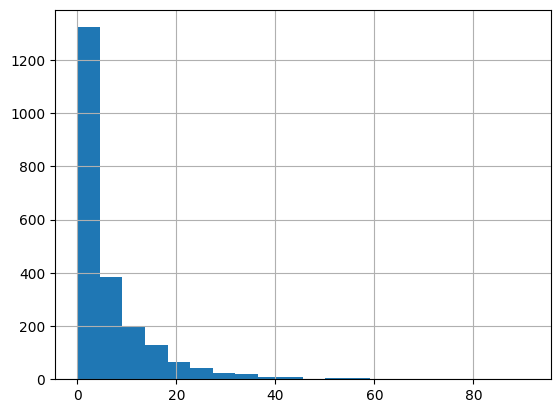

In [216]:
crime_v['murdPerPop'].hist(bins=20)

In [217]:
import plotly.express as px
df_plot = pd.DataFrame({'y_pred_test':y_pred_test,'y_test':y_test})
px.scatter(df_plot,x='y_pred_test',y= 'y_test',width=900 )

## Ridge Regression

In [ ]:
import warnings
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [246]:
# alpha=0 es equivalente a Regresión Lineal sin regularizar

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0)
ridgereg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

mae_train_ridge = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_ridge = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_ridge = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_ridge = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_ridge )
print("MAE Test: " , mae_test_ridge )

print('R2 en train: ', r2_train_ridge )
print('R2 en test: ', r2_test_ridge )

MAE Train:  3.74
MAE Test:  3.93
R2 en train:  0.636
R2 en test:  0.534


In [247]:
# Definir el modelo Ridge
ridge = Ridge()

# Definir los parámetros sobre los cuales realizar la búsqueda en cuadrícula
parameters = {'alpha': [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10, 100,200,500,800,1000]}

# Definir la métrica a optimizar, en este caso R2 Score
scorer = make_scorer(r2_score)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring=scorer, cv=5)

# Ajustar el modelo usando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_ridge = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejor modelo Ridge:", best_ridge)
print("Mejores parámetros:", best_params)
print("Mejor puntuación R2:", best_score)

Mejor modelo Ridge: Ridge(alpha=200)
Mejores parámetros: {'alpha': 200}
Mejor puntuación R2: 0.5580666388388836


In [248]:
# Creamos un rango de posibles valores de alpha
alpha_range = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1,0.5, 1,2,5, 10,20,50, 100,200,500,800,1000,2000]

# Listas para almacenar los valores de R2 en train y test
r2_train = []
r2_test = []

for alpha in alpha_range:
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(X_train, y_train)

    y_pred_train = ridgereg.predict(X_train)
    y_pred_test = ridgereg.predict(X_test)

    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))

# Crear la figura de Plotly
import plotly.graph_objects as go
fig = go.Figure()

# Agregar las líneas para R2 en train y test
fig.add_trace(go.Scatter(x=np.log10(alpha_range), y=r2_train, mode='lines', name='R2 Train'))
fig.add_trace(go.Scatter(x=np.log10(alpha_range), y=r2_test, mode='lines', name='R2 Test'))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='R2 Score para Diferentes Valores de Alpha',
    xaxis_title='log(alpha)',
    yaxis_title='R2 Score',
    width=1000,
    #legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)'),
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [249]:
np.log10(200)

2.3010299956639813

In [250]:
# El mejor fue el con Alpha=200
ridgereg = Ridge(alpha=200)
ridgereg.fit(X_train, y_train)

y_pred_train = ridgereg.predict(X_train)
y_pred_test = ridgereg.predict(X_test)

mae_train_ridge = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_ridge = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_ridge = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_ridge = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_ridge )
print("MAE Test: " , mae_test_ridge )

print('R2 en train: ', r2_train_ridge )
print('R2 en test: ', r2_test_ridge )

MAE Train:  3.77
MAE Test:  3.73
R2 en train:  0.611
R2 en test:  0.567


In [251]:
df_plot = pd.DataFrame({'y_pred_test':y_pred_test,'y_test':y_test})
px.scatter(df_plot,x='y_pred_test',y= 'y_test',width=900 )

Variables más importantes usando Ridge (alpha=200):
- **PctVacantBoarded**: percent of vacant housing that is boarded up (numeric - decimal)
- **racepctblack**: percentage of population that is african american (numeric - decimal
- **racePctWhite**: percentage of population that is caucasian (numeric - decimal)
- **PersPerOwnOccHous**: mean persons per owner occupied household (numeric - decimal)
-  **NumStreet**: number of homeless people counted in the street (numeric - expected to be integer
- **NumImmig**: total number of people known to be foreign born (numeric - expected to be integer)

In [252]:
imp = pd.DataFrame({'col':X.columns,
                    'importance':ridgereg.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
74,PctVacantBoarded,1.745667
2,racepctblack,1.446290
50,PctKidsBornNeverMar,0.771726
68,PctPersDenseHous,0.742732
21,whitePerCap,0.663764
97,autoTheft,0.632109
49,NumKidsBornNeverMar,0.550806
60,PctSpeakEnglOnly,0.505668
38,MalePctDivorce,0.471912
96,LemasPctOfficDrugUn,0.441127


In [253]:
len([x for x in ridgereg.coef_ if x !=0])

98

## Lasso Regression

In [254]:
# Probemos alpha=0. Sin regularización
from sklearn.linear_model import Lasso
import plotly.graph_objs as go

lassoreg = Lasso(alpha=0)
lassoreg.fit(X_train, y_train)

y_pred_train = lassoreg.predict(X_train)
y_pred_test = lassoreg.predict(X_test)

print("MAE Train: " , (metrics.mean_absolute_error(y_train, y_pred_train)))
print("MAE Test: " , (metrics.mean_absolute_error(y_test, y_pred_test)))

print('R2 en train: ', metrics.r2_score(y_train, y_pred_train))
print('R2 en test: ', metrics.r2_score(y_test, y_pred_test))

MAE Train:  3.7433405665389654
MAE Test:  3.9361334806744233
R2 en train:  0.63564127352401
R2 en test:  0.5326356471170179


In [255]:
# Creamos un rango de posibles valores de alpha
alpha_range = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1,0.5, 1,2,5, 10,20,50, 100,200,500,800,1000,2000]

# Listas para almacenar los valores de R2 en train y test
r2_train = []
r2_test = []

for alpha in alpha_range:
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(X_train, y_train)

    y_pred_train = lassoreg.predict(X_train)
    y_pred_test = lassoreg.predict(X_test)

    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))

# Crear la figura de Plotly
fig = go.Figure()

# Agregar las líneas para R2 en train y test
fig.add_trace(go.Scatter(x=np.log10(alpha_range), y=r2_train, mode='lines', name='R2 Train'))
fig.add_trace(go.Scatter(x=np.log10(alpha_range), y=r2_test, mode='lines', name='R2 Test'))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='R2 Score para Diferentes Valores de Alpha',
    xaxis_title='log(alpha)',
    yaxis_title='R2 Score',
    width=1000,
    #legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)'),
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [256]:
np.log10(0.05)

-1.3010299956639813

In [267]:
# El mejor fue el 0.05
lassoreg = Lasso(alpha=0.05)
lassoreg.fit(X_train, y_train)

y_pred_train = lassoreg.predict(X_train)
y_pred_test = lassoreg.predict(X_test)


mae_train_lasso = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_lasso = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_lasso = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_lasso = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_lasso )
print("MAE Test: " , mae_test_lasso )

print('R2 en train: ', r2_train_lasso )
print('R2 en test: ', r2_test_lasso )

MAE Train:  3.77
MAE Test:  3.67
R2 en train:  0.61
R2 en test:  0.573


In [268]:
df_plot = pd.DataFrame({'y_pred_test':y_pred_test,'y_test':y_test})
px.scatter(df_plot,x='y_pred_test',y= 'y_test',width=900 )

In [269]:
imp = pd.DataFrame({'col':X.columns,
                    'importance':lassoreg.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
74,PctVacantBoarded,2.044664
2,racepctblack,1.773619
97,autoTheft,1.585567
68,PctPersDenseHous,1.280488
60,PctSpeakEnglOnly,0.827124
50,PctKidsBornNeverMar,0.807647
42,PersPerFam,0.644393
49,NumKidsBornNeverMar,0.609706
96,LemasPctOfficDrugUn,0.455894
21,whitePerCap,0.398781


In [270]:
len([x for x in lassoreg.coef_ if x !=0])

51

In [271]:
dicc = [{
    'Modelo':'Linear Regression', 'MAE_train': mae_train_linear, 'MAE_test': mae_test_linear , 'R2_test': r2_test_lienar, 'R2_train': r2_train_linear},
    {'Modelo':'Ridge Regression', 'MAE_train': mae_train_ridge, 'MAE_test': mae_test_ridge , 'R2_test': r2_test_ridge, 'R2_train': r2_train_ridge},
    {'Modelo':'Lasso Regression', 'MAE_train': mae_train_lasso, 'MAE_test': mae_test_lasso, 'R2_test': r2_test_lasso, 'R2_train': r2_train_lasso,
}]

In [272]:
compara = pd.DataFrame(dicc)
compara

,Modelo,MAE_train,MAE_test,R2_test,R2_train
0,Linear Regression,3.74,3.93,0.534,0.636
1,Ridge Regression,3.77,3.73,0.567,0.611
2,Lasso Regression,3.77,3.67,0.573,0.610


In [273]:
import plotly.express as px
px.bar(compara, x='Modelo', y=['R2_train','R2_test'], width=600, barmode='group', text_auto=True)

In [ ]:
compara

In [274]:
fig = px.line(compara, x='Modelo', y=['MAE_test','MAE_train'], width=600, markers=True)
fig.update_traces(textposition="top center")
fig.show()

## Elastic Net

In [275]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [276]:
# Definir el modelo Elastic Net
elastic_net = ElasticNet()

# Definir los parámetros sobre los cuales realizar la búsqueda en cuadrícula
parameters = {'alpha': [0.01, 0.05, 0.1,0.2, 0.5,1,2,5, 10,20,100,200],
              'l1_ratio': [0.001,0.002, 0.1, 0.5,1,10,100,200, 500]}

# Definir la métrica a optimizar, en este caso R2 Score
scorer = make_scorer(r2_score)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=parameters, scoring=scorer, cv=5)

# Ajustar el modelo usando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_elastic_net = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_



print("Mejor modelo Elastic Net:", best_elastic_net)
print("Mejores parámetros:", best_params)
print("Mejor puntuación R2:", best_score)

Mejor modelo Elastic Net: ElasticNet(alpha=0.1, l1_ratio=0.001)
Mejores parámetros: {'alpha': 0.1, 'l1_ratio': 0.001}
Mejor puntuación R2: 0.557750723624383


In [277]:
best_elastic_net.fit(X_train, y_train)

y_pred_train = best_elastic_net.predict(X_train)
y_pred_test = best_elastic_net.predict(X_test)

mae_train_elastic = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_elastic = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_elastic = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_elastic = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_elastic )
print("MAE Test: " , mae_test_elastic )

print('R2 en train: ', r2_train_elastic )
print('R2 en test: ', r2_test_elastic )

MAE Train:  3.76
MAE Test:  3.73
R2 en train:  0.613
R2 en test:  0.567


## KNN Regressor

In [278]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Definir el modelo KNN
knn = KNeighborsRegressor()

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)  # Escoge las 10 mejores características
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# Definir los parámetros sobre los cuales realizar la búsqueda en cuadrícula
parameters = {'n_neighbors': [3,5,6,8, 9,12,15],
              'weights': ['uniform', 'distance']}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, scoring='explained_variance', cv=5)

# Ajustar el modelo usando la búsqueda en cuadrícula
grid_search.fit(X_train_selected, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntuación R2:", best_score)

# Obtener el mejor modelo KNN con los mejores parámetros
best_knn = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_test = best_knn.predict(X_test_selected)

# Calcular el R2 en el conjunto de prueba con el mejor modelo
r2_test = r2_score(y_test, y_pred_test)

Mejores parámetros: {'n_neighbors': 12, 'weights': 'distance'}
Mejor puntuación R2: 0.5662326323089195


In [ ]:
best_knn

In [279]:
training_r2 = []
test_r2 = []

#Iteramos de 1 a 20 vecinos
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train_selected, y_train)
    training_r2.append(r2_score(y_train, clf.predict(X_train_selected)))
    # Registrar R2 en conjunto de prueba
    test_r2.append(r2_score(y_test, clf.predict(X_test_selected)))

# Crear trazos para R2 en entrenamiento y prueba
trace_train = go.Scatter(x=list(neighbors_settings), y=training_r2, mode='lines', name='R2 en entrenamiento')
trace_test = go.Scatter(x=list(neighbors_settings), y=test_r2, mode='lines', name='R2 en prueba')

# Crear la figura
fig = go.Figure()
fig.add_trace(trace_train)
fig.add_trace(trace_test)

# Actualizar el diseño del gráfico
fig.update_layout(
    title='R2 en función del número de vecinos',
    xaxis_title='n_neighbors',
    yaxis_title='R2',
    legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)'),
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [280]:
best_knn = KNeighborsRegressor(n_neighbors=12, weights='distance')
best_knn.fit(X_train_selected, y_train)

y_pred_train = best_knn.predict(X_train_selected)
y_pred_test = best_knn.predict(X_test_selected)

mae_train_knn = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_knn = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_knn = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_knn = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_knn )
print("MAE Test: " , mae_test_knn )

print('R2 en train: ', r2_train_knn )
print('R2 en test: ', r2_test_knn )

MAE Train:  0.0
MAE Test:  3.79
R2 en train:  1.0
R2 en test:  0.537


In [281]:
# Definir los parámetros sobre los cuales realizar la búsqueda en cuadrícula
from sklearn.svm import SVR
parameters = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'rbf']  # Tipo de kernel
}

# Crear el objeto SVR
svr = SVR()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=parameters, scoring='r2', cv=5)

# Ajustar el modelo usando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntuación R2:", best_score)

Mejores parámetros: {'C': 0.1, 'kernel': 'linear'}
Mejor puntuación R2: 0.5185761668841936


# DecisionTreeRegressor

In [282]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Definir el modelo de árbol de decisión
dt = DecisionTreeRegressor()


# Definir los parámetros sobre los cuales realizar la búsqueda en cuadrícula
parameters = {'max_depth': [5, 10, 20, 30],  # Profundidad máxima del árbol
              'min_samples_split': [2, 5, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo interno
              'min_samples_leaf': [1, 2, 4,8]}  # Número mínimo de muestras requeridas para ser una hoja

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, scoring='r2', cv=5)

# Ajustar el modelo usando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntuación R2:", best_score)

Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor puntuación R2: 0.5195493703245372


In [283]:
# Obtener el mejor modelo de árbol de decisión con los mejores parámetros
best_dt = grid_search.best_estimator_

# Predicciones con el mejor modelo en train y test
y_pred_test = best_dt.predict(X_test)
y_pred_train = best_dt.predict(X_train)

mae_train_dt = np.round((metrics.mean_absolute_error(y_train, y_pred_train)),2)
mae_test_dt = np.round((metrics.mean_absolute_error(y_test, y_pred_test)),2)

r2_train_dt = np.round(metrics.r2_score(y_train, y_pred_train),3)
r2_test_dt = np.round(metrics.r2_score(y_test, y_pred_test),3)

print("MAE Train: " , mae_train_dt )
print("MAE Test: " , mae_test_dt )

print('R2 en train: ', r2_train_dt )
print('R2 en test: ', r2_test_dt )

MAE Train:  3.51
MAE Test:  3.91
R2 en train:  0.684
R2 en test:  0.51
